# 先根据赛事代码提示，整理数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
%matplotlib inline

In [2]:
# 读取候选人信息，由于原始数据没有表头，需要添加表头
names=['CAND_ID','CAND_NAME','CAND_ICI','PTY_CD','CAND_PTY_AFFILIATION','TTL_RECEIPTS',
      'TRANS_FROM_AUTH','TTL_DISB','TRANS_TO_AUTH','COH_BOP','COH_COP','CAND_CONTRIB',
       'CAND_LOANS','OTHER_LOANS','CAND_LOAN_REPAY','OTHER_LOAN_REPAY','DEBTS_OWED_BY',
       'TTL_INDIV_CONTRIB','CAND_OFFICE_ST','CAND_OFFICE_DISTRICT','SPEC_ELECTION','PRIM_ELECTION','RUN_ELECTION'
       ,'GEN_ELECTION','GEN_ELECTION_PRECENT','OTHER_POL_CMTE_CONTRIB','POL_PTY_CONTRIB',
       'CVG_END_DT','INDIV_REFUNDS','CMTE_REFUNDS']
weball=pd.read_csv('weball20.txt',sep='|',names=names)
weball.head(2)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H8AK00132,"SHEIN, DIMITRI",C,1,DEM,0.00,0.00,367.52,0.0,367.52,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,09/30/2019,0.0,0.0
1,H6AK00045,"YOUNG, DONALD E",I,2,REP,1738661.59,132712.44,1318574.74,0.0,116720.12,...,NaN,NaN,NaN,NaN,NaN,760794.63,500.0,09/30/2020,16625.0,3500.0


In [3]:
# 读取候选人和委员会的联系信息
names=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP','CMTE_DSGN','LINKAGE_ID']

ccl = pd.read_csv('ccl.txt',sep='|',names=names)
ccl.head(2)

,CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
0,C00713602,2019,2020,C00712851,O,U,228963
1,H0AK00105,2020,2020,C00607515,H,P,229250


In [4]:
# 读取个人捐赠数据，由于原始数据没有表头，需要添加表头
names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI',
       'IMAGE_NUM','TRANSACTION_TP','ENTITY_TP','NAME','CITY',
       'STATE','ZIP_CODE','EMPLOYER','OCCUPATION','TRANSACTION_DT',
       'TRANSACTION_AMT','OTHER_ID','TRAN_ID','FILE_NUM','MEMO_CD',
       'MEMO_TEXT','SUB_ID']
itcont = pd.read_csv('itcont_2020_20200722_20200820.txt', sep='|',names=names)
itcont.head(2)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00701888,A,M8,P,202009149267170153,10,IND,"BAUMGART, STEPHEN",LOS GATOS,CA,...,VARIAN MEDICAL SYSTEMS,SYSTEMS ENGINEER PHYSICIST,7222020,500,NaN,12885178,1437664,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4092320201849287519
1,C00701888,A,M8,P,202009149267170154,10,IND,"HELBERG, JACOB",SAN FRANCISCO,CA,...,STANFORD CYBER POLICY CENTER,SENIOR ADVISOR,7232020,250000,NaN,12854698,1437664,NaN,NaN,4092320201849287521


In [5]:
# 关联 ccl 和 weball 两个表数据
ccl = pd.merge(ccl,weball,on='CAND_ID',how='inner')

# 提取出所需要的列
columns=[ 'CMTE_ID','CAND_ID', 'CAND_NAME','CAND_PTY_AFFILIATION']
ccl = ccl.loc[:,columns]
ccl.head(2)

,CMTE_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00697789,H0AL01055,"CARL, JERRY LEE, JR",REP
1,C00701557,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP


In [6]:
# 将候选人与委员会关系表ccl和个人捐赠数据表itcont合并，通过 CMTE_ID
c_itcont =  pd.merge(ccl,itcont,on='CMTE_ID',how='inner')

# 提取需要的数据列
columns=[ 'CAND_NAME','NAME', 'STATE','EMPLOYER','OCCUPATION',
          'TRANSACTION_AMT', 'TRANSACTION_DT','CAND_PTY_AFFILIATION']
data = c_itcont[columns]
data.head()

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,7242020,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7242020,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7312020,REP
3,"WOOD, DANIEL","HOPKINS, RICHARD",AZ,POWERS-LEAVITT,INSURANCE AGENT,300,8102020,REP
4,"WOOD, DANIEL","PENDLETON, DIANE",AZ,UNEMPLOYED,NaN,500,8072020,REP


至此，得到数据集data，其包含8列变量：
- CAND_NAME – 接受捐赠的候选人姓名
- NAME – 捐赠人姓名
- STATE – 捐赠人所在州
- EMPLOYER – 捐赠人所在公司
- OCCUPATION – 捐赠人职业
- TRANSACTION_AMT – 捐赠数额（美元）
- TRANSACTION_DT – 收到捐款的日期
- CAND_PTY_AFFILIATION – 候选人党派

# 观察数据

In [7]:
# 查看数据的行列
data.shape

(756205, 8)

In [8]:
print('各变量的数据类型：\n', data.dtypes)

各变量的数据类型：
 CAND_NAME               object
NAME                    object
STATE                   object
EMPLOYER                object
OCCUPATION              object
TRANSACTION_AMT          int64
TRANSACTION_DT           int64
CAND_PTY_AFFILIATION    object
dtype: object


In [9]:
# 修改 TRANSACTION_DT 变量为 datetime64格式
data.TRANSACTION_DT = pd.to_datetime(data.TRANSACTION_DT,errors='raise',format='%m%d%Y')
data.dtypes

CAND_NAME                       object
NAME                            object
STATE                           object
EMPLOYER                        object
OCCUPATION                      object
TRANSACTION_AMT                  int64
TRANSACTION_DT          datetime64[ns]
CAND_PTY_AFFILIATION            object
dtype: object

In [10]:
# 再次查看数据
data.head(2)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,2020-07-24,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020-07-24,REP


In [11]:
# 查看数据的整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CAND_NAME             756205 non-null  object        
 1   NAME                  756205 non-null  object        
 2   STATE                 756160 non-null  object        
 3   EMPLOYER              737413 non-null  object        
 4   OCCUPATION            741294 non-null  object        
 5   TRANSACTION_AMT       756205 non-null  int64         
 6   TRANSACTION_DT        756205 non-null  datetime64[ns]
 7   CAND_PTY_AFFILIATION  756205 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 51.9+ MB


In [12]:
# 进一步查看缺失值情况
print('各变量的缺失值比例：\n', data.isnull().sum(axis=0) / data.shape[0])

各变量的缺失值比例：
 CAND_NAME               0.000000
NAME                    0.000000
STATE                   0.000060
EMPLOYER                0.024850
OCCUPATION              0.019718
TRANSACTION_AMT         0.000000
TRANSACTION_DT          0.000000
CAND_PTY_AFFILIATION    0.000000
dtype: float64


In [13]:
# 个人习惯：在进行描述性统计分析时，只对缺失值进行删除操作，不进行填充操作
# 个人认为对数据进行填充操作会人为破坏数据的内在规律

# STATE  EMPLOYER  OCCUPATION 删除缺失值所在行
data0 = data.dropna(axis=0)
data0.isnull().sum()

CAND_NAME               0
NAME                    0
STATE                   0
EMPLOYER                0
OCCUPATION              0
TRANSACTION_AMT         0
TRANSACTION_DT          0
CAND_PTY_AFFILIATION    0
dtype: int64

In [14]:
# 查看数据的重复值情况

data [data.duplicated(keep=False)]

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
156,"DEEGAN, DONNA","BASEMAN, GWEN",FL,NOT EMPLOYED,NOT EMPLOYED,2800,2020-07-29,DEM
157,"DEEGAN, DONNA","BASEMAN, GWEN",FL,NOT EMPLOYED,NOT EMPLOYED,2800,2020-07-29,DEM
380,"MAKKI, AMANDA","D'ORSIE, FRANK J MR.",PA,RETIRED,RETIRED,20,2020-07-29,REP
381,"MAKKI, AMANDA","D'ORSIE, FRANK J MR.",PA,RETIRED,RETIRED,20,2020-07-29,REP
420,"MAKKI, AMANDA","RINKER, LEIGHAN",FL,RETIRED,RETIRED,50,2020-07-28,REP
...,...,...,...,...,...,...,...,...
756078,"REED, JOHN F.","ALMON, DAWN",FL,NOT EMPLOYED,NOT EMPLOYED,100,2020-08-07,DEM
756114,"AYYADURAI, SHIVA DR","AYYADURAI, SHIVA",MA,BUSINESS,SCIENTIST,5,2020-08-12,REP
756115,"AYYADURAI, SHIVA DR","AYYADURAI, SHIVA",MA,BUSINESS,SCIENTIST,5,2020-08-12,REP
756184,"SMITH, TINA","HALUSKA, JOHN",MN,NORBORD,MARKETING,10,2020-07-22,DEM


需要注意一下，在此数据集中发现了7万多条重复数据。
- 本文不对重复值做处理，有以下两点原因：
* 1）其他竞赛者也未作相关处理
* 2）不清楚数据的收集方式，存在重复值可能是个人在一天内进行了多次同一金额的捐款

In [15]:
data.TRANSACTION_AMT.describe()

count    7.562050e+05
mean     1.504307e+02
std      2.320452e+03
min     -5.600000e+03
25%      2.000000e+01
50%      3.500000e+01
75%      1.000000e+02
max      1.500000e+06
Name: TRANSACTION_AMT, dtype: float64

In [16]:
# 文本列的描述性统计分析
columns = data.columns[data.dtypes == 'object']
data[columns].describe()

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,CAND_PTY_AFFILIATION
count,756205,756205,756160,737413,741294,756205
unique,312,326352,62,93604,26497,12
top,"BIDEN, JOSEPH R JR","CAMPBELL, JANET",CA,NOT EMPLOYED,NOT EMPLOYED,DEM
freq,507816,165,127895,227547,224109,524576


# 描述性统计分析——单变量

In [17]:
# 数据期限统计
a=data.TRANSACTION_DT.max() 
b=data.TRANSACTION_DT.min()
print('数据搜集截止日期：',a)
print('数据搜集开始日期',b)
print('数据搜集的天数',a-b+np.timedelta64(1,'D'))

数据搜集截止日期： 2020-08-20 00:00:00
数据搜集开始日期 2020-07-22 00:00:00
数据搜集的天数 30 days 00:00:00


In [18]:
# 被捐款次数TOP5的候选者
data.CAND_NAME.value_counts()[:5]

BIDEN, JOSEPH R JR        507816
SULLIVAN, DAN              82389
JACOBS, CHRISTOPHER L.     82003
TRUMP, DONALD J.           58506
SHAHEEN, JEANNE             4618
Name: CAND_NAME, dtype: int64

可以看出，在30天内，给BIDEN, JOSEPH R JR（拜登）捐款的人数达到了50万，排名第一；
而给TRUMP, DONALD J.（特朗普）捐款的人数为5.8万，排名第四。（其他三位不知道是谁~）
- 特朗普这个时候已经不行了呀~

In [19]:
# 捐款次数TOP5的州
data.STATE.value_counts()[:5]

CA    127895
TX     54457
FL     54343
NY     49453
MA     29314
Name: STATE, dtype: int64

可以看出，前五名分别是：CA(加利福利亚)、TX（德克萨斯州）、FL(弗罗里达)、NY(纽约)、MA(马萨诸塞州)

In [20]:
# 周几捐款次数最多？
# 计算30天有几个星期n
date_list = []  
for i in range(29):
    date_list.append(np.datetime64('2020-07-22')+i)
date_se = pd.Series(date_list,name='times')
date_se = date_se.dt.dayofweek.value_counts() 

# 计算数据中周几捐款的次数
DT_counts = data.TRANSACTION_DT.dt.dayofweek.value_counts()
DT_concat = pd.merge(DT_counts,date_se,left_index=True,right_index=True)
DT_concat['data'] = DT_concat.TRANSACTION_DT / DT_concat.times
DT_concat

,TRANSACTION_DT,times,data
3,159644,4,39911.00
2,140201,5,28040.20
1,112014,4,28003.50
4,111219,4,27804.75
5,84817,4,21204.25
0,80302,4,20075.50
6,68008,4,17002.00


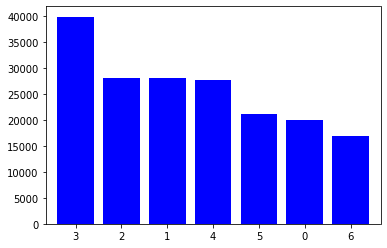

In [21]:
DT_concat.data.plot.bar(width=0.8,
                        rot=0, # 设置x轴标签旋转的角度，0为水平显示
                        color='blue')

# plt.ylabel('捐款人次')
# plt.xticks(range(7),labels=['周四','周三','周二','周五','周六','周一','周日'])
plt.show()

可以看出，周四的捐款人数最多（原因暂且不知~）
~ 天池绘图时怎么显示中文标签呀？半天也没弄出来。。。

In [22]:
# 收到捐款次数TOP5的党派
data.CAND_PTY_AFFILIATION.value_counts()[:5]

DEM    524576
REP    229467
LIB       974
IND       886
DFL       179
Name: CAND_PTY_AFFILIATION, dtype: int64

DEM(民主党)、REP(共和党)排名靠前

# 描述性统计分析——双变量

## 1）CAND_NAME 和 STATE
- 捐款次数TOP5的州，捐给了那位候选者

In [23]:
cand_name_top5 =['BIDEN, JOSEPH R JR','SULLIVAN, DAN','JACOBS, CHRISTOPHER L.','TRUMP, DONALD J.','SHAHEEN, JEANNE']
state_top5=['CA','TX','FL','NY','MA' ]
x = data.query('STATE == @state_top5 & CAND_NAME==@cand_name_top5')
y = pd.crosstab(x['STATE'],x['CAND_NAME'],margins=True)
y

CAND_NAME,"BIDEN, JOSEPH R JR","JACOBS, CHRISTOPHER L.","SHAHEEN, JEANNE","SULLIVAN, DAN","TRUMP, DONALD J.",All
STATE,,,,,,
CA,96044,11145,600,10714,8007,126510
FL,29999,8207,165,7774,5884,52029
MA,20017,1040,504,1004,886,23451
NY,38301,3312,385,3505,2775,48278
TX,27534,9402,98,9296,6575,52905
All,211895,33106,1752,32293,24127,303173


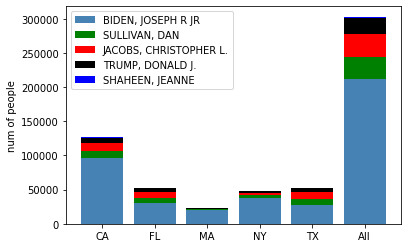

In [24]:
plt.bar(range(len(y.index)),
        y['BIDEN, JOSEPH R JR'],
        color='steelblue',
        label='BIDEN, JOSEPH R JR',
        tick_label = y.index  # 指定x轴的刻度标签
        )
plt.bar(range(len(y.index)),
        y['SULLIVAN, DAN'],
        bottom= y['BIDEN, JOSEPH R JR'], 
        color='green',
        label='SULLIVAN, DAN'
        )
plt.bar(range(len(y.index)),
        y['JACOBS, CHRISTOPHER L.'],
        bottom= y['BIDEN, JOSEPH R JR'] + y['SULLIVAN, DAN'], 
        color='red',
        label='JACOBS, CHRISTOPHER L.'
        )
plt.bar(range(len(y.index)),
        y['TRUMP, DONALD J.'],
        bottom= y['BIDEN, JOSEPH R JR'] + y['SULLIVAN, DAN'] + y['JACOBS, CHRISTOPHER L.'], 
        color='black',
        label='TRUMP, DONALD J.'
        )
plt.bar(range(len(y.index)),
        y['SHAHEEN, JEANNE'],
        bottom= y['BIDEN, JOSEPH R JR'] + y['SULLIVAN, DAN'] + y['JACOBS, CHRISTOPHER L.'] +y['TRUMP, DONALD J.'], 
        color='blue',
        label='SHAHEEN, JEANNE'
        )
plt.ylabel('num of people')
plt.legend()
plt.show()

可以看出，对于捐款人数最多的5个州，以及捐款人数最多的5个被捐款的候选人而言，绝大多数人都捐款给了 BIDEN, JOSEPH R JR（拜登）
- 从这里看，拜登的胜出几乎是碾压式的

## 2）CAND_NAME 和 EMPLOYER
- 捐款次数TOP5的职业，捐给了那位候选者

In [36]:
EMPLOYER_top5 = list(data.EMPLOYER.value_counts().index[:5])
x = data.query('CAND_NAME==@cand_name_top5 & EMPLOYER==@EMPLOYER_top5')
y = pd.crosstab(x['EMPLOYER'],x['CAND_NAME'])
y

CAND_NAME,"BIDEN, JOSEPH R JR","JACOBS, CHRISTOPHER L.","SHAHEEN, JEANNE","SULLIVAN, DAN","TRUMP, DONALD J."
EMPLOYER,,,,,
NOT EMPLOYED,222043,146,0,0,677
RETIRED,16296,49579,0,50813,28289
SELF,772,4278,0,416,15
SELF EMPLOYED,3313,1100,0,95,29
SELF-EMPLOYED,38277,361,475,5373,5561


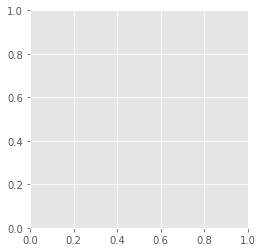

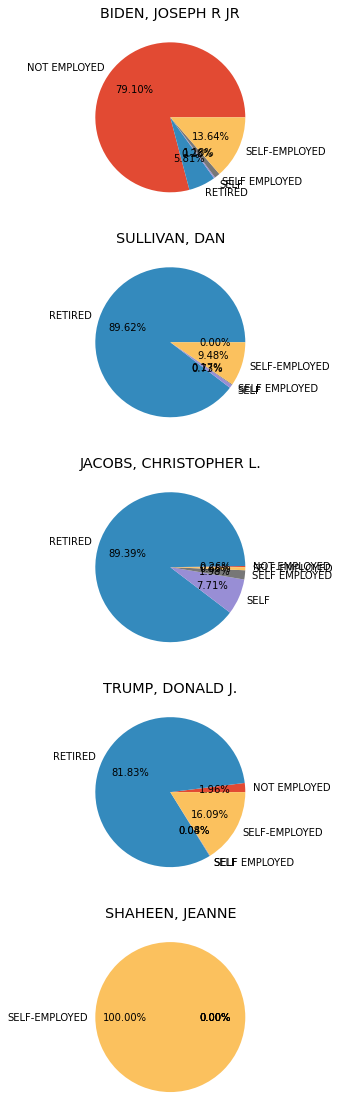

In [43]:
plt.style.use('ggplot') # 设施图形风格
plt.axes(aspect = 'equal') # 让饼图显示为正圆
plt.figure(figsize=(20,20))
q=1
for i in cand_name_top5:
    plt.subplot(5,1,q)
    q+=1
    pie_data=y[i]
    pie_data.name=''
    pie_data.plot.pie(autopct='%.2f%%',
                      title=f'{i}') # 设置百分比格式
plt.show()

根据上图应该可以说明：每个候选人代表着不同职业者的利益
- 对于拜登而言，NOT EMPLOYED(自由职业者)的捐款人数占了总人数的3/4.【相对而言，年轻人更倾向于选择拜登】
- 对于特朗普而言，RETIRED(退休人员)的捐款人数占了总人数的3/4.【相对而言，老年人更倾向于选择特朗普】

## 3）CAND_NAME 和 TRANSACTION_AMT
- 候选者们收到的捐款金额TOP5

In [50]:
data.groupby('CAND_NAME').sum().sort_values(by='TRANSACTION_AMT',ascending=False)[:5]

,TRANSACTION_AMT
CAND_NAME,
"BIDEN, JOSEPH R JR",68111142
"TRUMP, DONALD J.",16594982
"SULLIVAN, DAN",9912465
"JACOBS, CHRISTOPHER L.",6939209
"BLOOMBERG, MICHAEL R.",3451916


拜登收到的捐款金额上为6.8千万美元，而特朗普收到的捐款金额上为1.6千万美元，依旧被碾压
- 前面的分析有：
- 捐款给拜登的人数约为50万，而捐款给特朗普的人数约为5.8万
- 是否可以猜测，相对于拜登的选民，特朗普的选民平均来说更有钱~

## 4）STATE 和 EMPLOYER
- 看一下各个州的捐款职业分布

In [58]:
x= data.query(' EMPLOYER == @EMPLOYER_top5')
pd.crosstab(x['STATE'],x['EMPLOYER']).sort_values(by='NOT EMPLOYED',ascending=False)[:10]

EMPLOYER,NOT EMPLOYED,RETIRED,SELF,SELF EMPLOYED,SELF-EMPLOYED
STATE,,,,,
CA,41916,19386,935,951,10616
FL,16101,15596,462,415,3003
NY,14381,6124,375,444,4463
TX,11411,15944,783,391,3664
WA,10561,3915,134,180,1554
MA,9859,1984,192,294,2512
PA,8382,4962,137,156,1581
VA,7802,4045,129,107,1253
IL,6902,3867,147,168,1337


州与州之间的捐款职业还是存在很大的差异的

## 5）STATE 和 TRANSACTION_AMT 
- 看一下各个州的捐款金额分布

In [61]:
data.groupby('STATE').sum().sort_values(by='TRANSACTION_AMT',ascending=False)[:10]

,TRANSACTION_AMT
STATE,
CA,19999115
NY,11468537
FL,8128789
TX,8101871
MA,5187957
WA,4455361
IL,3788997
VA,3659134
PA,3501967


## 6）CAND_PTY_AFFILIATION  和 TRANSACTION_AMT 
- 看一下各个党派收到的捐款金额分布

In [63]:
data.groupby('CAND_PTY_AFFILIATION').sum().sort_values(by='TRANSACTION_AMT',ascending=False)[:10]

,TRANSACTION_AMT
CAND_PTY_AFFILIATION,
DEM,75961730
REP,37170653
IND,328802
LIB,169202
DFL,76825
GRE,18607
NON,11256
UNK,10195
CON,4117


DEM(民主党)、REP(共和党)，分别对应BIDEN, JOSEPH R JR(拜登)和TRUMP, DONALD J.(特朗普)

## 7）TRANSACTION_DT  和 TRANSACTION_AMT 
- 查看捐款金额的时间序列变化

<AxesSubplot:xlabel='TRANSACTION_DT'>

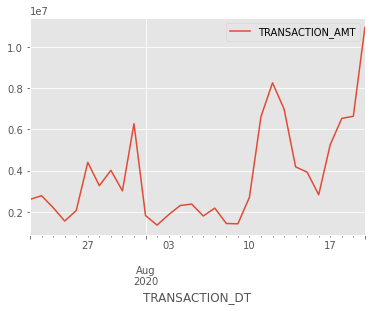

In [66]:
data.groupby('TRANSACTION_DT').sum().plot.line()

每天的捐款数都有着变化，而且，可以猜测捐款金额会在下一段时间内继续增加
- 仅凭这一个月的捐款金额数据来推测最终的捐款金额会存在较大的误差